### 1) PROBLEM STATEMENT 

### 2) IMPORTING BASIC LIBRARIES

In [56]:
# Importing numpy library for working with arrays
import numpy as np
# Importing pandas library for working with data sets
import pandas as pd
# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
# Splitting dataset into train/test sets
from sklearn.model_selection import train_test_split  
# Apply different preprocessing to different columns
from sklearn.compose import ColumnTransformer  
# Combine preprocessing + model in one workflow
from sklearn.pipeline import Pipeline  
# Handle missing values (mean, median, most_frequent, etc.)
from sklearn.impute import SimpleImputer  
# Encode categorical variables into binary (one-hot) vectors
from sklearn.preprocessing import OneHotEncoder  
# Standardize features (mean=0, variance=1)
from sklearn.preprocessing import StandardScaler  
# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,          # Accuracy metric for classification
    f1_score,                # F1-score (harmonic mean of precision & recall)
    roc_auc_score,           # Area under ROC curve (classification)
    classification_report,   # Full classification report (precision, recall, F1)
    confusion_matrix,        # Confusion matrix (TP, FP, TN, FN)
    r2_score,                # R² score (regression performance)
    mean_absolute_error,     # MAE (average absolute error, regression)
    mean_squared_error       # MSE (average squared error, regression)
)
# Machine Learning Models

# Linear Models
from sklearn.linear_model import LogisticRegression   # Classification (binary/multi-class)
from sklearn.linear_model import LinearRegression     # Regression (predict continuous values)

# Ensemble Models
from sklearn.ensemble import RandomForestClassifier   # Classification using Random Forest
from sklearn.ensemble import GradientBoostingClassifier  # Classification using Gradient Boosting
from sklearn.ensemble import RandomForestRegressor    # Regression using Random Forest
from sklearn.ensemble import GradientBoostingRegressor # Regression using Gradient Boosting

# Utility Libraries
import re        # Regular expressions for text/data processing
import warnings  # To manage/suppress warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output


### 3) IMPORTING THE DATA

In [57]:
#  File Handling & Data Loading

from pathlib import Path   # For handling file paths in an OS-independent way
import pandas as pd        # Pandas for data manipulation & analysis

# Path to the dataset file (can be CSV or Excel)
data_path = "dataset.csv"   # Example: replace with your actual file name

# Get the file extension in lowercase (e.g., '.csv', '.xlsx')
suffix = Path(data_path).suffix.lower()

# Load the dataset depending on file type
if suffix == ".csv":
    df = pd.read_csv(data_path)       # Read CSV file
elif suffix in (".xlsx", ".xlsm"):
    df = pd.read_excel(data_path)     # Read Excel file (.xlsx, .xlsm)
else:
    raise ValueError("Please provide CSV or XLSX file.")  # Handle unsupported formats

# Keep a copy of the raw dataset (backup before preprocessing)
raw_df = df.copy()

# Print the shape of the dataset (rows, columns)
print(df.shape)

# Display first 5 rows of the dataset
df.head()


(1200, 28)


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### 4) DOMAIN ANALYSIS

In [58]:
# Guessing Target Column (Heuristics)

# Look for columns that contain "perf" or "performance" (case-insensitive)
cands = [c for c in df.columns if re.search(r"perf|performance", str(c), re.I)]

if cands:
    # If found, pick the first matching column as target
    target_col = cands[0]
else:
    # Fallback option: choose the last column in the dataset
    # (you can adjust this rule depending on your dataset)
    target_col = df.columns[-1]

# Print/return the detected target column
target_col


'PerformanceRating'

### 5) BASIC CHECK

In [59]:
#Upgrade (or install if not already installed) the pandas library
#Pandas is used for data manipulation, analysis, and working with tabular data
!pip install --upgrade pandas

In [60]:
#Imports
import io        # For capturing console output (used with df.info)
import pandas as pd   # Pandas for DataFrame operations
import inspect   # For checking function signatures dynamically

# DataFrame Summarizer Function
def summarize_df(df: pd.DataFrame, n: int = 5):
    """
    Print a concise summary of a pandas DataFrame:
    - Shape of dataset (rows, columns)
    - Column names
    - DataFrame info (dtypes, non-nulls, memory usage)
    - Missing values count
    - Descriptive stats (numeric, categorical, datetime if supported)
    - First and last n rows preview
    """
    
    # Dataset shape & column names
    print("="*80)
    print(" Shape:", df.shape)                   # Rows, Columns
    print(" Columns:", list(df.columns))         # All column names
    
    # DataFrame info (datatype, nulls, memory usage)
    print("\n" + "="*80)
    print("Info:")
    buf = io.StringIO()            # Capture df.info() output into a string buffer
    df.info(buf=buf)
    print(buf.getvalue())          # Print the captured info
    
    # Missing values
    print("\n" + "="*80)
    print("? Missing values:")
    missing = df.isna().sum().sort_values(ascending=False)  # Count NaNs per column
    print(missing[missing > 0] if missing.sum() > 0 else "No missing values ")
    
    # Descriptive statistics
    print("\n" + "="*80)
    print(" Descriptive stats (all types):")
    
    # Check if pandas version supports "datetime_is_numeric" param in describe()
    sig = inspect.signature(pd.DataFrame.describe)
    if "datetime_is_numeric" in sig.parameters:
        summary_all = df.describe(include="all", datetime_is_numeric=True).T
    else:
        summary_all = df.describe(include="all").T
    
    print(summary_all)   # Print descriptive statistics
    
    # Preview top & bottom rows
    print("\n" + "="*80)
    print(f" Preview (first {n} rows):")
    print(df.head(n))
    print(f"\n Preview (last {n} rows):")
    print(df.tail(n))
    print("="*80)

In [61]:
#  Run the DataFrame Summarizer
summarize_df(df)   # Call the function on your DataFrame "df"

 Shape: (1200, 28)
 Columns: ['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition', 'PerformanceRating']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                    

### 6) EDA

##### 
I. UNIVARIATE ANALYSIS

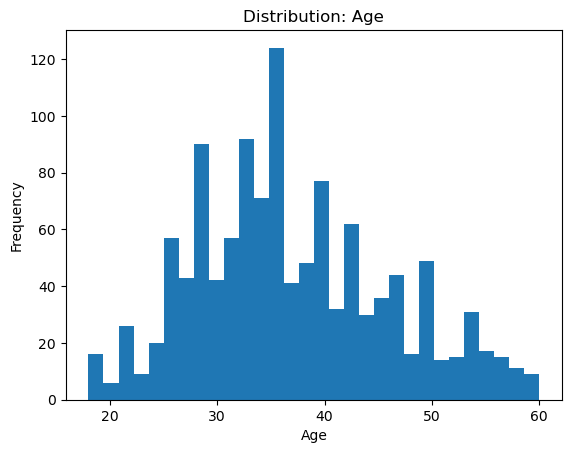

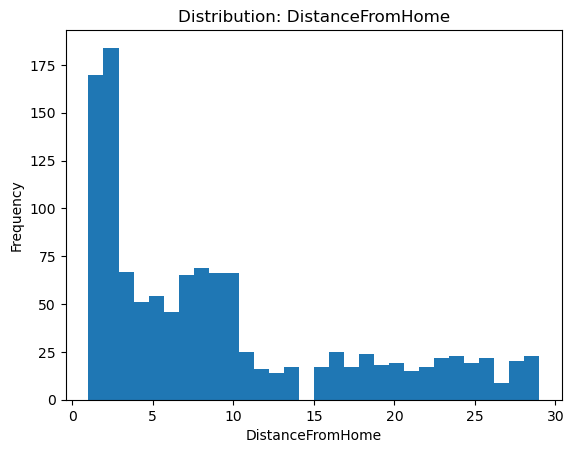

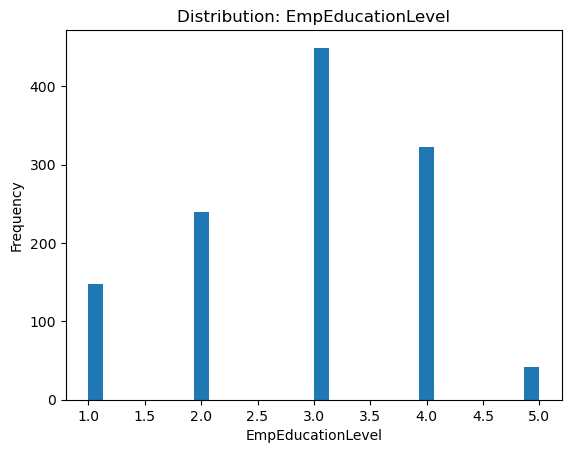

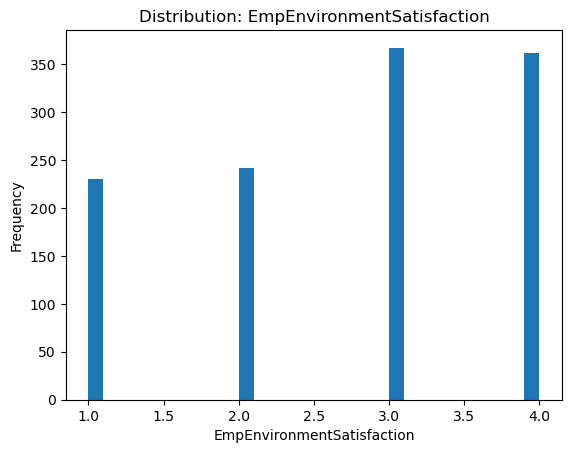

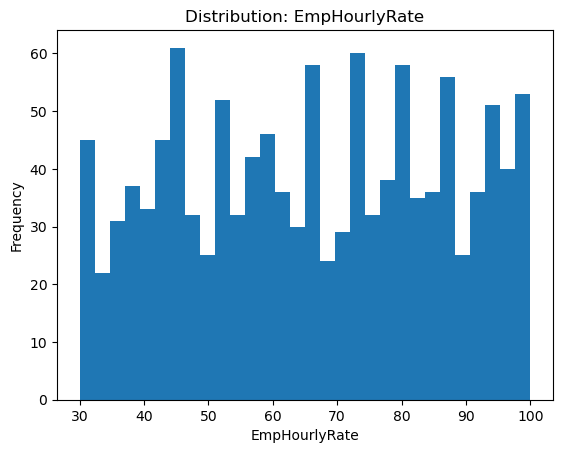

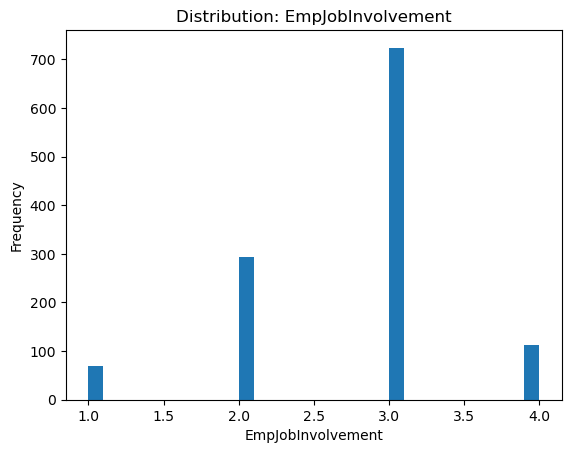

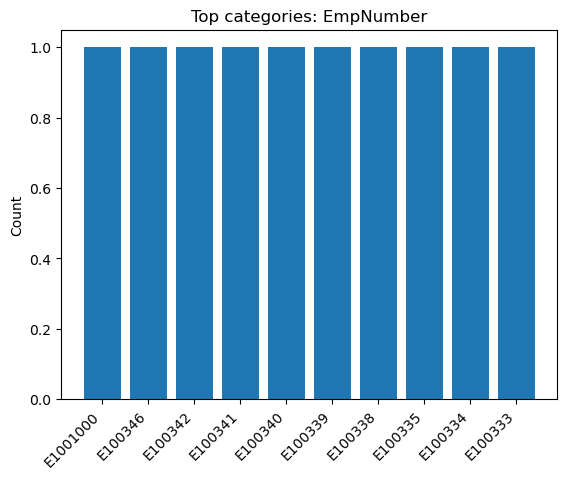

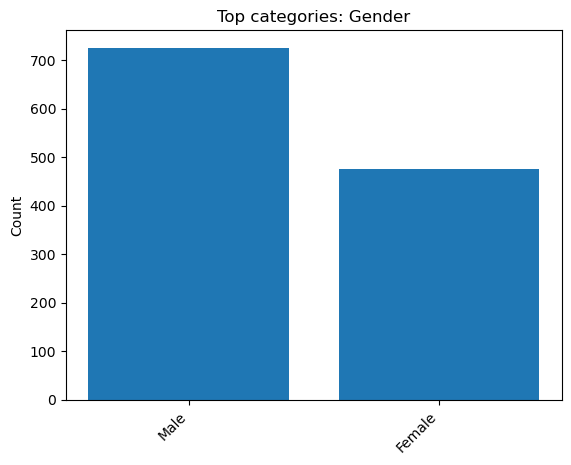

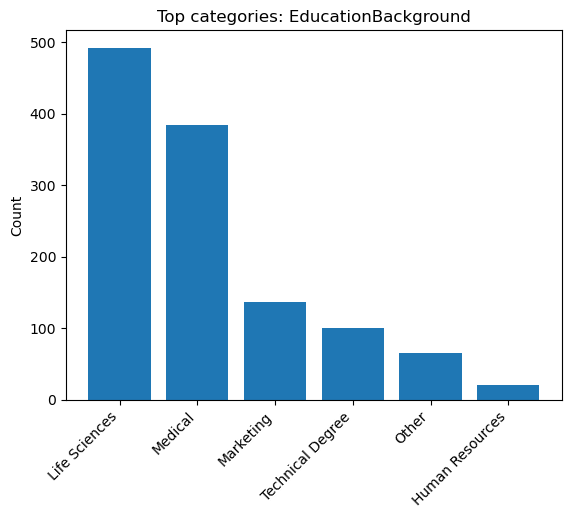

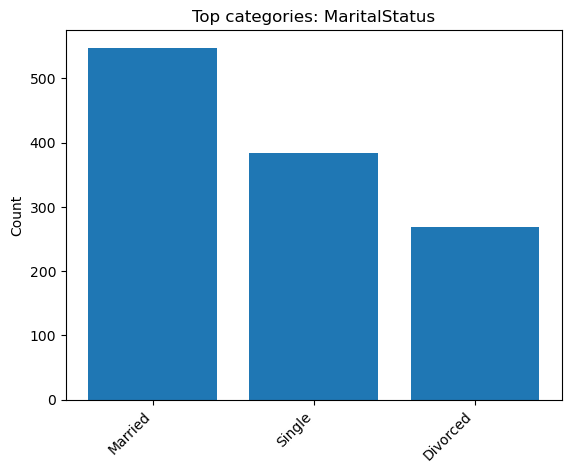

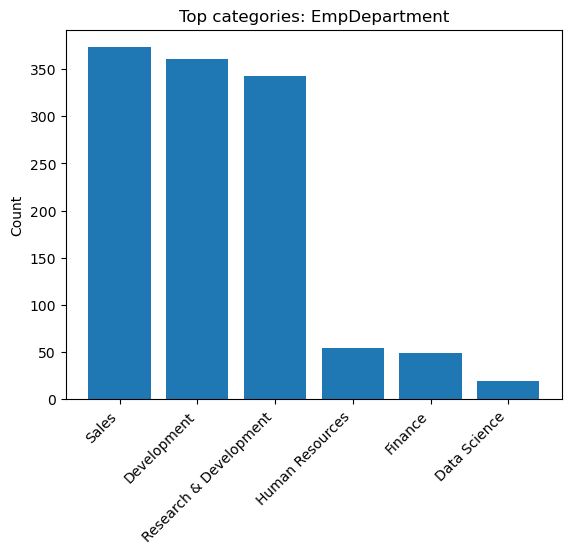

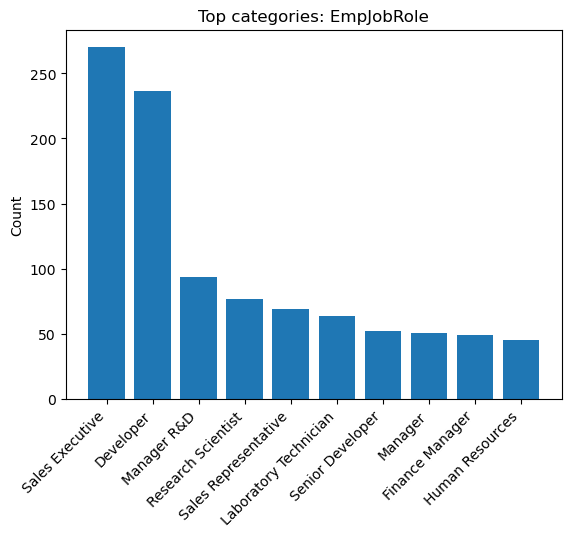

In [62]:
#  Separate Numeric & Categorical Columns


# Get numeric columns (exclude target column if numeric)
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c != target_col]

# Get categorical columns (dtype = object, exclude target column)
cat_cols = [c for c in df.columns if df[c].dtype == 'object' and c != target_col]

# Histograms for Numeric Features

# Plot histograms for up to 6 numeric columns
for col in num_cols[:6]:
    plt.figure()                               # Create new figure
    plt.hist(df[col].dropna(), bins=30)        # Histogram (ignore NaN values)
    plt.title(f"Distribution: {col}")          # Title with column name
    plt.xlabel(col)                            # X-axis label
    plt.ylabel("Frequency")                    # Y-axis label
    plt.show()                                 # Display plot

# Bar Charts for Categorical Features
# Plot bar charts for up to 6 categorical columns (top 10 categories shown)
for col in cat_cols[:6]:
    vc = df[col].value_counts().head(10)       # Top 10 most frequent categories
    plt.figure()                               # New figure
    plt.bar(vc.index.astype(str), vc.values)   # Bar chart
    plt.title(f"Top categories: {col}")        # Title
    plt.xticks(rotation=45, ha='right')        # Rotate labels for readability
    plt.ylabel("Count")                        # Y-axis label
    plt.show()                                 # Display plot


##### II. BIVERIATE ANALYSIS

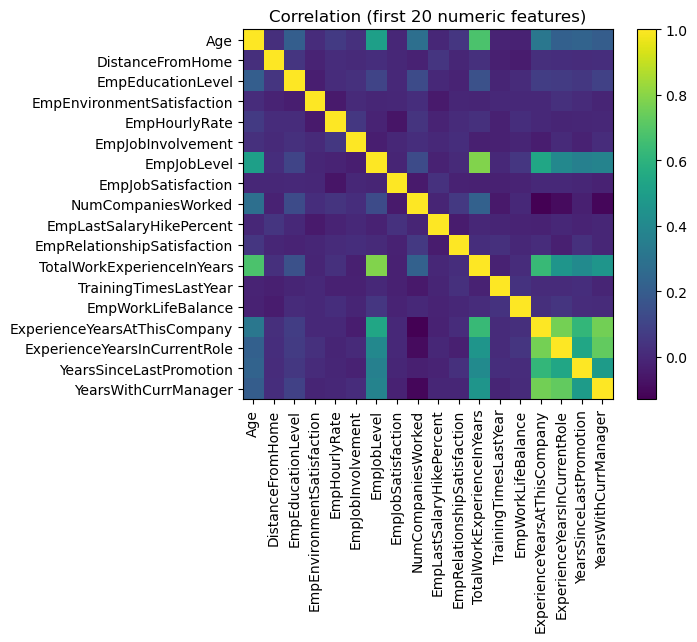

In [63]:
# 🔗 Correlation Heatmap (first 20 numeric features)

# Only plot if at least 2 numeric columns exist
if len(num_cols) >= 2:
    # Compute correlation matrix for up to 20 numeric features
    corr = df[num_cols[:20]].corr(numeric_only=True)

    # Create a new figure for the heatmap
    plt.figure()

    # Show correlation values as a heatmap
    plt.imshow(corr, interpolation='nearest')

    # Add title and color bar (to represent correlation strength)
    plt.title("Correlation (first 20 numeric features)")
    plt.colorbar()

    # Set x-axis ticks (rotated for readability)
    plt.xticks(range(corr.shape[1]), corr.columns, rotation=90)

    # Set y-axis ticks
    plt.yticks(range(corr.shape[0]), corr.index)

    # Display the heatmap
    plt.show()


##### III. MULTIVERIATE ANALYSIS

In [64]:
# Department-wise Performance Analysis

# Try to detect a "department" column automatically (case-insensitive search)
dept_col = next((c for c in df.columns if re.search(r"dept|department", str(c), re.I)), None)

# If a department column exists, analyze performance
if dept_col is not None:
    
    # Case 1: Target column is numeric (Regression task)
    if pd.api.types.is_numeric_dtype(df[target_col]):
        # Group by department and calculate stats: count, mean, median, std
        dept_summary = (
            df.groupby(dept_col)[target_col]
              .agg(['count', 'mean', 'median', 'std'])
              .reset_index()
              .head(20)   # Show first 20 depts only
        )
        display(dept_summary)
    
    # Case 2: Target column is categorical (Classification task)
    else:
        # Group by department + target class and calculate normalized proportions
        tmp = (
            df.groupby(dept_col)[target_col]
              .value_counts(normalize=True)         # class distribution per dept
              .rename("proportion")                 # rename column
              .reset_index()
              .head(20)                             # Show first 20 rows only
        )
        display(tmp)

,EmpDepartment,count,mean,median,std
0,Data Science,20,3.050000,3.0,0.394034
1,Development,361,3.085873,3.0,0.388508
2,Finance,49,2.775510,3.0,0.586846
3,Human Resources,54,2.925926,3.0,0.544331
4,Research & Development,343,2.921283,3.0,0.559016
5,Sales,373,2.860590,3.0,0.555400


### 7) DATA PREPROCESSING 

In [65]:
# Data Cleaning
# Remove duplicate rows if any
df = df.drop_duplicates()

#  Split Features (X) and Target (y)
X = df.drop(columns=[target_col])   # All columns except target
y = df[target_col]                  # Target column


#  Detect Task Type (Classification vs Regression)
is_numeric_target = pd.api.types.is_numeric_dtype(y)   # Check if target is numeric
unique_vals = y.dropna().unique()                      # Unique target values (ignoring NaN)

# Heuristic:
# - If target is numeric AND has many unique values → Regression
# - Else → Classification
if is_numeric_target and len(unique_vals) > 10:
    task_type = "regression"
else:
    task_type = "classification"

print(f"Detected Task Type: {task_type}")


#  Identify Feature Types

cat_cols = [c for c in X.columns if X[c].dtype == 'object']                  # Categorical features
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]     # Numeric features

#  Preprocessing Pipelines
# Numeric pipeline: handle missing → scale
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),          # Fill NaNs with median
    ("scaler", StandardScaler(with_mean=False)),            # Standardize numeric features
])

# Categorical pipeline: handle missing → one-hot encode
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),   # Fill NaNs with most frequent category
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True)),  # Encode categories
])

# Combine numeric + categorical transformers
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),  # Apply numeric pipeline
    ("cat", categorical_transformer, cat_cols),  # Apply categorical pipeline
])

#  Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,            # 20% test, 80% train
    random_state=42,          # Reproducibility
    stratify=y if task_type == "classification" else None   # Stratify for classification only
)

Detected Task Type: classification


### 8) FEATURE SELECTION

In [66]:
# Will rely on model importances / coefficients as a first pass

### 9) MODEL IMPLEMENTATION 

In [67]:
# Store evaluation results
results = []

# Select models based on task type
if task_type == "classification":
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "RandomForestClassifier": RandomForestClassifier(n_estimators=300, random_state=42),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    }
else:
    models = {
        "LinearRegression": LinearRegression(),
        "RandomForestRegressor": RandomForestRegressor(n_estimators=300, random_state=42),
        "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    }

from sklearn.pipeline import Pipeline

# Variables to store the best model and its performance
best_name, best_pipe, best_score = None, None, -1e9

# Loop through each model
for name, model in models.items():
    # Create pipeline with preprocessing + model
    pipe = Pipeline([("preprocess", preprocessor), ("model", model)])
    
    # Train the pipeline
    pipe.fit(X_train, y_train)
    
    # Predict on test set
    preds = pipe.predict(X_test)
    
    # If task is classification → evaluate with accuracy & F1 score
    if task_type == "classification":
        acc = accuracy_score(y_test, preds)
        f1w = f1_score(y_test, preds, average="weighted")
        score = f1w  # Using F1-weighted as main score for model comparison
        results.append({"model": name, "accuracy": acc, "f1_weighted": f1w})
    
    # If task is regression → evaluate with R², MAE, RMSE
    else:
        r2 = r2_score(y_test, preds)
        mae = mean_absolute_error(y_test, preds)
        rmse = mean_squared_error(y_test, preds, squared=False)
        score = r2  # Using R² as main score for model comparison
        results.append({"model": name, "r2": r2, "mae": mae, "rmse": rmse})
    
    # Update best model if current model performs better
    if score > best_score:
        best_score, best_name, best_pipe = score, name, pipe

# Convert results into DataFrame and sort by last metric (F1 or R²)
pd.DataFrame(results).sort_values(by=list(pd.DataFrame(results).columns)[-1], ascending=False)


,model,accuracy,f1_weighted
2,GradientBoostingClassifier,0.937500,0.935973
0,LogisticRegression,0.820833,0.809945
1,RandomForestClassifier,0.766667,0.695813


### 10) MODEL EVALUTION

In [68]:
if task_type == "classification":
    y_pred = best_pipe.predict(X_test)
    print(f"Best Model: {best_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 (weighted):", f1_score(y_test, y_pred, average="weighted"))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
else:
    y_pred = best_pipe.predict(X_test)
    print(f"Best Model: {best_name}")
    print("R2:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Best Model: GradientBoostingClassifier
Accuracy: 0.9375
F1 (weighted): 0.9359730886908795

Classification Report:
               precision    recall  f1-score   support

           2       0.89      0.85      0.87        39
           3       0.94      0.98      0.96       175
           4       1.00      0.77      0.87        26

    accuracy                           0.94       240
   macro avg       0.94      0.87      0.90       240
weighted avg       0.94      0.94      0.94       240



### FEATURE IMPORTANTS

In [69]:
# Extract top features from the best model (tree importances or absolute coefficients)
final_model = best_pipe.named_steps["model"]

# Recover feature names from the preprocessor
ohe = best_pipe.named_steps["preprocess"].transformers_[1][1].named_steps["onehot"]
cat_in = best_pipe.named_steps["preprocess"].transformers_[1][2]
num_in = best_pipe.named_steps["preprocess"].transformers_[0][2]

feature_names = list(num_in) + list(ohe.get_feature_names_out(cat_in))

if hasattr(final_model, "feature_importances_"):
    importances = final_model.feature_importances_
elif hasattr(final_model, "coef_"):
    coef = final_model.coef_
    if coef.ndim > 1:
        importances = np.mean(np.abs(coef), axis=0)
    else:
        importances = np.abs(coef)
else:
    importances = None

if importances is not None:
    imp_df = pd.DataFrame({"feature": feature_names, "importance": importances})
    imp_df = imp_df.sort_values("importance", ascending=False)
    top3 = imp_df.head(3)
    display(top3)
else:
    print("Model does not expose importances; consider permutation importance.")

,feature,importance
3,EmpEnvironmentSatisfaction,0.252267
9,EmpLastSalaryHikePercent,0.227054
16,YearsSinceLastPromotion,0.180630


### 12) HYPERPARAMETER TUNNING

In [70]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid based on task type
if task_type == "classification":
    # Parameters to tune for RandomForestClassifier
    grid = {
        "model__n_estimators": [200, 300, 500],        # Number of trees in the forest
        "model__max_depth": [None, 5, 10],            # Maximum depth of each tree
        "model__min_samples_split": [2, 5, 10]        # Minimum samples required to split a node
    }
    # Create pipeline: preprocessing + RandomForestClassifier
    base = Pipeline([("preprocess", preprocessor), 
                     ("model", RandomForestClassifier(random_state=42))])
else:
    # Parameters to tune for RandomForestRegressor
    grid = {
        "model__n_estimators": [200, 300, 500],
        "model__max_depth": [None, 5, 10],
        "model__min_samples_split": [2, 5, 10]
    }
    # Create pipeline: preprocessing + RandomForestRegressor
    base = Pipeline([("preprocess", preprocessor), 
                     ("model", RandomForestRegressor(random_state=42))])

# Initialize GridSearchCV to find the best hyperparameters
search = GridSearchCV(base, grid, cv=3, n_jobs=-1)  # cv=3 → 3-fold cross-validation, n_jobs=-1 → use all CPUs

# Fit the search on training data
search.fit(X_train, y_train)

# Print the best hyperparameters and best cross-validation score
print("Best params:", search.best_params_)
print("Best CV score:", search.best_score_)

Best params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best CV score: 0.7895833333333333


 ### 13) MODEL COMPARISION REPORT

In [71]:
# Convert the list of dictionaries 'results' into a pandas DataFrame
# This makes it easier to view, sort, and analyze the evaluation metrics of all models
df_results = pd.DataFrame(results)

# Display the DataFrame sorted by the last metric column (e.g., F1-score for classification or R² for regression)
# ascending=False → sorts from highest to lowest
df_results_sorted = df_results.sort_values(by=list(df_results.columns)[-1], ascending=False)

# Print the sorted DataFrame
print(df_results_sorted)

                        model  accuracy  f1_weighted
2  GradientBoostingClassifier  0.937500     0.935973
0          LogisticRegression  0.820833     0.809945
1      RandomForestClassifier  0.766667     0.695813


###  14) Challenges Faced

 ##### Missing values and mixed data types

##### Class imbalance / skewed targets

##### Encoding high-cardinality categoricals

##### Balancing accuracy vs. interpretability

### 15) Conclusion & Recommendations

##### Deploy the best model as a hiring-support tool with clear boundaries (use as a signal, not sole decision-maker).

##### Run controlled experiments targeting the Top 3 factors to test causal impact.

##### Establish ongoing monitoring: data drift, model performance, fairness/bias checks.

##### Department-wise Actions (if available):

##### Identify low-performing departments and tailor training/mentorship.

##### Align incentives to the measured drivers (e.g., training hours, tenure paths, project allocation).